<a href="https://colab.research.google.com/github/davideandres95/ml_comm/blob/main/tut01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Tutorial 1: Introduction to Python and Equalizer in Pytorch
October 21st, 2021

In this tutorial, we will introduce the basic principles of Python and Pytorch. 

## Table of Contents


*   1) Python Intro: 
    * Arrays
    * Loops and Conditions
    * Print formatting
    * Plotting
*   2) Pytorch Intro:
    * Tensors
* 3) Equalizer Example



## Jupyter Notebooks

We will use Jupyter Notebooks during the whole semester.

*   Jupyter Notebooks are composed of cells that can contain text (like this cell), images, LaTex, **code**,...
*   Connects to a Python runtime environment in the background to execute code




## 1) Python Intro
### Numpy Arrays

In [ ]:
import numpy as np

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print('Visualize the array: ')
print(a)
print('Number of elements in the array: ', a.size)
print('Shape of the array: ', a.shape)
print('Data type of the array: ', a.dtype)

Visualize the array: 
[[1 2 3]
 [4 5 6]]
Number of elements in the array:  6
Shape of the array:  (2, 3)
Data type of the array:  int64


In [ ]:
a = np.array([[1., 2., 3.], [4., 5., 6.]])
a.dtype

dtype('float64')

#### Indexing, Slicing, Reshaping

In [ ]:
print('Access a single element: ', a[1,2])
print('Access a row: ', a[0,:])
print('Access a column: ', a[:,1])

Access a single element:  6.0
Access a row:  [1. 2. 3.]
Access a column:  [2. 5.]


In [ ]:
print(np.reshape(a, (3,2)))
print(np.reshape(a, (-1,6)))

[[1. 2.]
 [3. 4.]
 [5. 6.]]
[[1. 2. 3. 4. 5. 6.]]


#### Passing by reference

In [ ]:
print('Array a before reference: ', a)
b = a[:,0]
b[:] = 8
print('Array a after reference: ', a)



Array a before reference:  [[1. 2. 3.]
 [4. 5. 6.]]
Array a after reference:  [[8. 2. 3.]
 [8. 5. 6.]]


In [ ]:
# if real copies are needed
a[:,0] = [1, 4] 
b = a[:,0].copy()
b[:] = 8
print(a)

[[1. 2. 3.]
 [4. 5. 6.]]


### Loops and conditions
Be careful of the 0-indexing!

In [ ]:
for i in range(5):
    print(i)

0
1
2
3
4


In [ ]:
if a[0,0]==0:
    print('first element is zero')
elif a[0,0]==1:
    print('first element is one')
else:
    print('first element is nor zero nor one')
    

first element is one


### Print formatting
It is important to have feedback from the code.

In [ ]:
n = 10
m = 3
print('The result of the division between {:d} and {:d} is {:.2f}.'.format(n,m,n/m))
print(f'The result of the division between {n :d} and {m :d} is {n/m :.2f}.')

The result of the division between 10 and 3 is 3.33.
The result of the division between 10 and 3 is 3.33.


### Plotting

In [ ]:
import matplotlib.pyplot as plt

#### Signal time plot

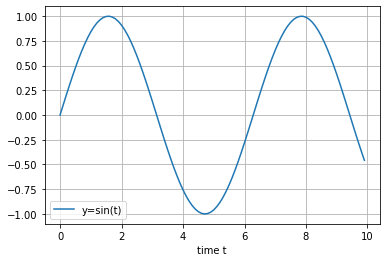

In [ ]:
t = np.arange(0,10,0.1)
y = np.sin(t)
plt.plot(t,y, label='y=sin(t)')
plt.grid()
plt.xlabel('time t')
plt.legend()

#### Constellation scatterplot

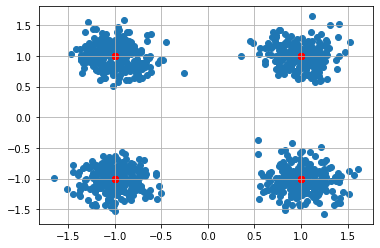

In [ ]:
constellation = [1+1j, -1+1j, -1-1j, 1-1j]
x = np.random.choice(constellation, 1000)
noise = np.random.normal(0, 0.2, size=(1000,)) +  1j* np.random.normal(0, 0.2, size=(1000,))
y = x + noise
plt.scatter(np.real(y), np.imag(y))
plt.scatter(np.real(x), np.imag(x), color='r')
plt.grid()

#### Histogram

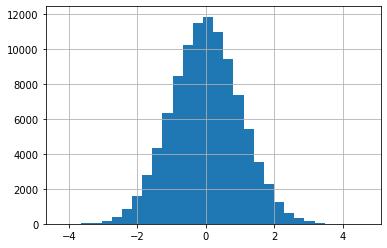

In [ ]:
x = np.random.normal(0,1,100000)
plt.hist(x, bins=30);
plt.grid()


## 2) Pytorch Intro
Let's look at some basic manipulations of tensors.

In [ ]:
import torch

In [ ]:
a = torch.tensor([5., 3.])
print(a)
print(a.dtype)

tensor([5., 3.])
torch.float32


32-bit floating point numbers is the default data type in Pytorch. If desired, it can be overwritten.

In [ ]:
a = torch.tensor([5, 3], dtype=torch.int16)
print(a)

tensor([5, 3], dtype=torch.int16)


#### Pass by reference
Numpy's ndarrays and Pytorch's tensors are highly compatible and it is easy to switch between them. 
This is a way to create an object with the same undelying memory. This means that chenges to the new tensor are reflected to the ndarray.

In [ ]:
a = np.array([[1,2],[3,4]])
print(a)
b = torch.from_numpy(a[:,0])
print(b)
b[:] = 8
print(a)

[[1 2]
 [3 4]]
tensor([1, 3])
[[8 2]
 [8 4]]


The conversion works also in the other direction, with the same rule.


In [ ]:
b = torch.rand(2,3)
print(b)
a = b.numpy()
print(a)

tensor([[0.7598, 0.4796, 0.4333],
        [0.4386, 0.6542, 0.6171]])
[[0.7598103  0.4795537  0.43333578]
 [0.4385661  0.6541998  0.61712897]]


#### Copy from NumPy
If we do not wish the two objects to use the same undelying memory, torch.tensor() creates a copy of the data.

In [ ]:
a = np.array([[1,2],[3,4]])
b = torch.tensor(a)
print(b)
b[0,0]=8
print(a)

tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]


#### Maths 
Tensors performs mathematic and arithmetic operations intuitively, and very similar to Numpy.

In [ ]:
ones = torch.ones(2,3)
print(ones)
twos = ones * 2
print(twos)
threes = ones + twos
print(threes)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])


In [ ]:
m = torch.rand((10,10)) # matrix of random numbers between 0 and 1
print('Max value of the matrix: ', torch.max(m))
print('Mean value of the matrix: ', torch.mean(m))
print('Determinant of the matrix: ', torch.det(m))

Max value of the matrix:  tensor(0.9996)
Mean value of the matrix:  tensor(0.5248)
Determinant of the matrix:  tensor(0.0047)


## 3) Equalizer example

In [ ]:
from torch import nn, optim
import matplotlib.pyplot as plt

In [ ]:
def downsample_td(signal, down):
    assert len(signal.shape)==2, 'signal format [number_dimensions][signal_length] expected'
    return down * signal[:, ::down]

In [ ]:
# Initialize Filter
num_taps = 41
nn_filter = nn.Conv1d (in_channels=1 ,
                       out_channels=1 ,
                       kernel_size=num_taps,
                       padding='same' )

In [ ]:
# Import data
# https://drive.google.com/file/d/18wBNg-3RH0waZ-PhJAsrS99PrqOODKYU/view?usp=sharing
# https://drive.google.com/file/d/1a3f16dFKTgr_K7zKCZfLIaZYfAz0__Cd/view?usp=sharing
!wget -O x.txt "https://drive.google.com/uc?export=download&id=18wBNg-3RH0waZ-PhJAsrS99PrqOODKYU"
!wget -O y.txt "https://drive.google.com/uc?export=download&id=1a3f16dFKTgr_K7zKCZfLIaZYfAz0__Cd"

In [ ]:
# Prepare data
x = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')
y_t = torch.Tensor(y.reshape(1, 1, -1))
x_t = torch.Tensor(x.reshape(1, -1))

In [ ]:
# Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(nn_filter.parameters())

In [ ]:
[p for p in nn_filter.parameters()]

[Parameter containing:
 tensor([[[-0.0915, -0.0672,  0.1162, -0.0096,  0.0467, -0.0532,  0.0950,
            0.0317,  0.0370,  0.0816,  0.0726,  0.1291, -0.1491,  0.0263,
            0.0865, -0.0144,  0.1137,  0.0994,  0.0476,  0.0522,  0.1515,
            0.0393,  0.1072, -0.0954, -0.0184,  0.0281,  0.1027,  0.0609,
           -0.0068, -0.1115,  0.0298, -0.1194, -0.0857, -0.0471,  0.0232,
            0.1438,  0.0049,  0.0479,  0.0229, -0.0221,  0.0255]]],
        requires_grad=True), Parameter containing:
 tensor([-0.0320], requires_grad=True)]

In [ ]:
# Trainings loop
for j in range(1000):
    x_hat = nn_filter(y_t).reshape(1, -1)
    x_hat = downsample_td(x_hat, 2)
    loss = loss_fn(x_hat, x_t)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if j % 50 == 0:
        print(f'epoch {j}: Loss = {loss.detach().numpy() :.4f}')

epoch 0: Loss = 4.8101
epoch 50: Loss = 2.6190
epoch 100: Loss = 1.5170
epoch 150: Loss = 0.9038
epoch 200: Loss = 0.5273
epoch 250: Loss = 0.2967
epoch 300: Loss = 0.1613
epoch 350: Loss = 0.0851
epoch 400: Loss = 0.0439
epoch 450: Loss = 0.0224
epoch 500: Loss = 0.0114
epoch 550: Loss = 0.0060
epoch 600: Loss = 0.0033
epoch 650: Loss = 0.0021
epoch 700: Loss = 0.0015
epoch 750: Loss = 0.0012
epoch 800: Loss = 0.0010
epoch 850: Loss = 0.0009
epoch 900: Loss = 0.0009
epoch 950: Loss = 0.0008


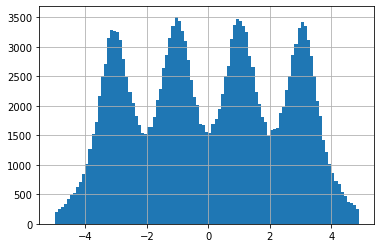

In [ ]:
plt.hist(downsample_td(y.reshape(1,-1), 2).reshape(-1), bins=np.arange(-5, 5, 0.1))
plt.grid()

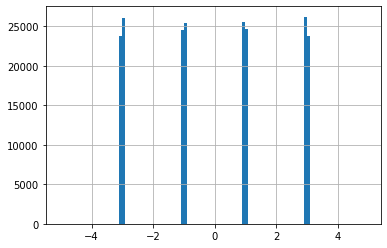

In [ ]:
plt.hist(x_hat.detach().numpy().reshape(-1), bins=np.arange(-5, 5, 0.1));
plt.grid()